In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore') 

np.random.seed(1234)

In [2]:
mu_feats = np.load('../train_data/AllGlobal_Mu_Final.npy')
std_feats = np.load('../train_data/AllGlobal_Std_Final.npy')

In [4]:
data = pd.read_csv('../test_data/TestOriginal.csv')

In [5]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68U,distKpc_68L,distErrKpc,logDistKpc,logDistKpcErr
0,63,2M18485678+4236290,2104787210611014400,2.416010,4626.186523,0.056648,-0.238552,0.021405,0.117770,10.806890,...,6.5735,2.00975,0.926939,0.103611,0.979596,0.994229,0.964184,0.015022,-0.008953,0.006663
1,2684,2M19510870+4632109,2080288167403250432,2.456936,4614.778320,0.057361,0.038648,0.064882,0.182413,13.261917,...,5.0699,1.81300,0.826412,0.117158,2.596544,2.641262,2.549764,0.045749,0.414396,0.007656
2,102,2M18512189+4704269,2107536745594840832,2.576948,4915.012695,0.002488,0.014503,-0.063482,0.305817,9.822883,...,1.7163,0.17465,0.299071,0.040227,0.740020,0.747317,0.733483,0.006917,-0.130756,0.004057
3,2692,2M19512284+4732289,2086359017777701888,2.460654,4758.196289,0.003549,0.066459,0.072979,0.203991,13.053179,...,4.7315,0.70335,0.720573,0.056521,2.824735,2.854179,2.795632,0.029273,0.450978,0.004501
4,416,2M19041265+3743311,2099096550745632384,2.961279,4716.458496,-0.010533,0.286038,0.077310,0.342110,12.971998,...,3.9355,1.12280,0.687520,0.098033,1.575454,1.597723,1.553138,0.022293,0.197406,0.006146


In [6]:
len(data)

603

In [7]:
feats = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']


In [8]:
for i in range(len(feats)):
    scaledFeat = (data[feats[i]] - mu_feats[i])/std_feats[i]
    scaledEFeat = data[featsErr[i]]/std_feats[i]

    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [9]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,63,2M18485678+4236290,2104787210611014400,2.416010,4626.186523,0.056648,-0.238552,0.021405,0.117770,10.806890,...,-1.166847,0.000544,-1.287147,0.000267,-1.346504,0.029713,-1.443342,0.027833,-1.472694,0.012764
1,2684,2M19510870+4632109,2080288167403250432,2.456936,4614.778320,0.057361,0.038648,0.064882,0.182413,13.261917,...,1.500272,0.000658,1.407164,0.000609,1.343629,0.023999,1.281945,0.020875,1.263374,0.018565
2,102,2M18512189+4704269,2107536745594840832,2.576948,4915.012695,0.002488,0.014503,-0.063482,0.305817,9.822883,...,-2.317431,0.000379,-2.297978,0.000186,-2.253880,0.026284,-2.262088,0.020875,-2.233873,0.015084
3,2692,2M19512284+4732289,2086359017777701888,2.460654,4758.196289,0.003549,0.066459,0.072979,0.203991,13.053179,...,1.223182,0.000783,1.220112,0.000476,1.209923,0.022856,1.185691,0.018555,1.206517,0.019726
4,416,2M19041265+3743311,2099096550745632384,2.961279,4716.458496,-0.010533,0.286038,0.077310,0.342110,12.971998,...,1.147705,0.000863,1.121968,0.000538,1.144783,0.025141,1.155539,0.024354,1.128775,0.020886


(array([  5.,  19., 128., 121.,  86.,  74.,  58.,  50.,  46.,  16.]),
 array([2.21243024, 2.31988556, 2.42734089, 2.53479621, 2.64225154,
        2.74970686, 2.85716219, 2.96461751, 3.07207284, 3.17952816,
        3.28698349]),
 <a list of 10 Patch objects>)

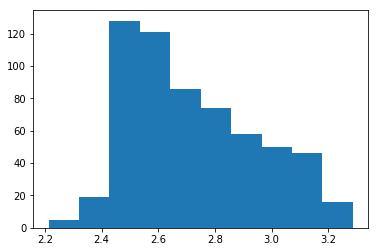

In [10]:
import matplotlib.pyplot as plt

plt.hist(data['LOGG'])

(array([  5.,  19., 128., 121.,  86.,  74.,  58.,  50.,  46.,  16.]),
 array([-2.32198863, -1.84275175, -1.36351488, -0.884278  , -0.40504113,
         0.07419575,  0.55343262,  1.03266949,  1.51190637,  1.99114324,
         2.47038012]),
 <a list of 10 Patch objects>)

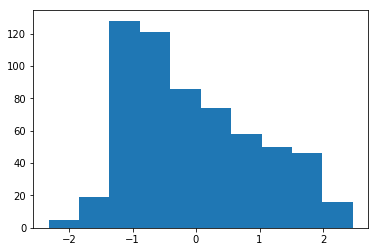

In [11]:
plt.hist(data['LOGG_NORM'])

(array([  5.,  19., 128., 121.,  86.,  74.,  58.,  50.,  46.,  16.]),
 array([-2.32198863, -1.84275175, -1.36351488, -0.884278  , -0.40504113,
         0.07419575,  0.55343262,  1.03266949,  1.51190637,  1.99114324,
         2.47038012]),
 <a list of 10 Patch objects>)

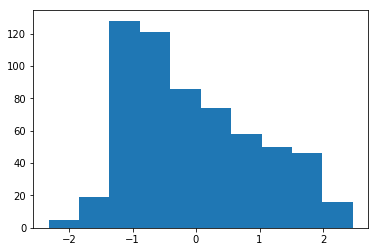

In [12]:
plt.hist((data['LOGG'] - mu_feats[0])/std_feats[0])

(array([  4.,  19.,  73.,  84., 112., 106.,  92.,  55.,  44.,  14.]),
 array([-2.58612394, -2.07583912, -1.5655543 , -1.05526949, -0.54498467,
        -0.03469985,  0.47558497,  0.98586978,  1.4961546 ,  2.00643942,
         2.51672423]),
 <a list of 10 Patch objects>)

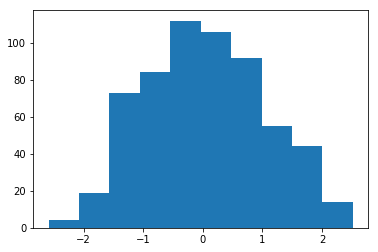

In [13]:
plt.hist((data['TEFF'] - mu_feats[1])/std_feats[1])

(array([  4.,  19.,  73.,  84., 112., 106.,  92.,  55.,  44.,  14.]),
 array([-2.58612394, -2.07583912, -1.5655543 , -1.05526949, -0.54498467,
        -0.03469985,  0.47558497,  0.98586978,  1.4961546 ,  2.00643942,
         2.51672423]),
 <a list of 10 Patch objects>)

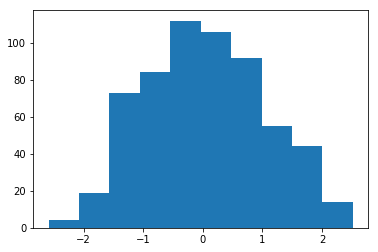

In [14]:
plt.hist(data['TEFF_NORM'])

In [15]:
data.to_csv('../test_data/TestOriginalNorm.csv')